# STEP 1: INSTALLATION AND SETUP

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# STEP 2: DATA PREPROCESSING

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train, y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

# STEP 2: BUILDING THE MODEL

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
# EMBEDDING LAYER

# model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(28,28)))

In [ ]:
# LSTM LAYER
model.add(tf.keras.layers.LSTM(units=128, return_sequences=True, activation="tanh", input_shape=(28, 28)))
model.add(tf.keras.layers.LSTM(units=128, return_sequences=True, activation="tanh"))
model.add(tf.keras.layers.LSTM(units=128, activation="tanh"))

In [ ]:
# OUTPUT LAYER
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 lstm_1 (LSTM)               (None, 28, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 344842 (1.32 MB)
Trainable params: 344842 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 151s 294ms/step - loss: 0.3194 - accuracy: 0.8977 - val_loss: 0.1784 - val_accuracy: 0.9414
Epoch 2/5
469/469 [==============================] - 126s 270ms/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0840 - val_accuracy: 0.9744
Epoch 3/5
469/469 [==============================] - 130s 277ms/step - loss: 0.0681 - accuracy: 0.9793 - val_loss: 0.0675 - val_accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 129s 275ms/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 0.0528 - val_accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 126s 270ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0569 - val_accuracy: 0.9824


In [ ]:
# y_pred = (model.predict(x_test)>0.5).astype("int32")
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 15s 46ms/step


In [ ]:
print(y_test[8], print(y_pred[8]))

6
5 None


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)


In [ ]:
cm.sum()

10000

In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
acc_cm

0.9824

In [ ]:
# Learning Curve

def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

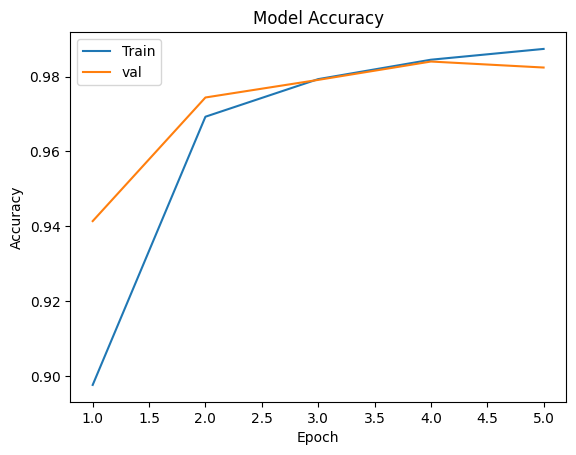

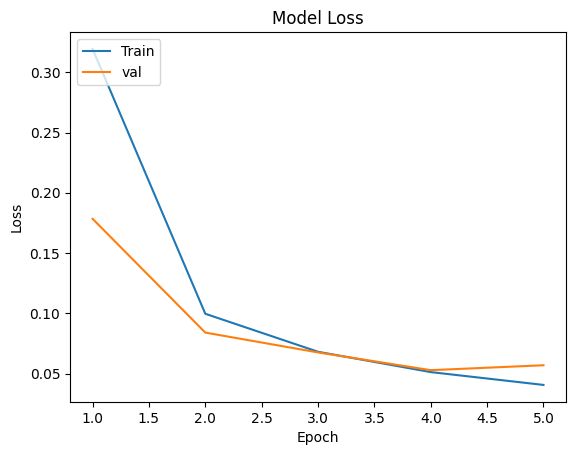

In [ ]:
learning_curve(history, 5 )

In [1]:
pwd


'C:\\Users\\abmin\\MACHINE LEARNING'